<a href="https://colab.research.google.com/github/daniribeirof/UB_DS-ML_Capstone-project_Bicing-predictions/blob/main/02_Visualization_partII_GeoPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Required libraries:

In [ ]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as md
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12)
plt.rc('figure', figsize = (12, 5))

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install geopandas #pandas with geographic information
!pip install contextily #to add background to maps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 79.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 5.1 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
import contextily as cx

# **Load processed Data Frames:**
All data processement can be check on file:

[01_DF_creation_Station&Bicing_info](https://colab.research.google.com/drive/1L4QHje5e7tBrphzDqBJ0FZrVmALJmC0g?usp=sharing)


## DF Bicing: 2019-2022

In [ ]:
df = pd.read_csv('/content/drive/My Drive/CapstoneProject_NathyDani/df_final.csv')

In [ ]:
df.shape

(2967415, 18)

In [ ]:
df.head()

,station_id,lat,lon,altitude,address,post_code,capacity,date,year,month,day,day_of_week,hour,percentage_docks_available,ctx-4,ctx-3,ctx-2,ctx-1
0,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-01,2022,1,1,5,4,0.72,0.68,0.73,0.74,0.72
1,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-01,2022,1,1,5,9,0.58,0.67,0.63,0.62,0.61
2,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-01,2022,1,1,5,14,0.75,0.62,0.67,0.74,0.75
3,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-01,2022,1,1,5,19,0.65,0.76,0.72,0.69,0.68
4,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,2022-01-02,2022,1,2,6,0,0.59,0.66,0.68,0.66,0.59


## DF stations:

In [ ]:
df_stations = pd.read_csv('/content/drive/My Drive/CapstoneProject_NathyDani/df_stations.csv')

In [ ]:
df_stations.shape

(509, 7)

In [ ]:
df_stations.head()

,station_id,lat,lon,altitude,address,post_code,capacity
0,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46
1,2,41.395488,2.177198,17.0,"C/ ROGER DE FLOR, 126",8013,29
2,3,41.394156,2.181331,11.0,"C/ NÀPOLS, 82",8013,27
3,4,41.393317,2.181248,8.0,"C/ RIBES, 13",8013,21
4,5,41.391103,2.180176,7.0,"PG. LLUIS COMPANYS, 11 (ARC TRIOMF)",8018,39


# GeoPandas:

In [ ]:
df_stations.head()

,station_id,lat,lon,altitude,address,post_code,capacity
0,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46
1,2,41.395488,2.177198,17.0,"C/ ROGER DE FLOR, 126",8013,29
2,3,41.394156,2.181331,11.0,"C/ NÀPOLS, 82",8013,27
3,4,41.393317,2.181248,8.0,"C/ RIBES, 13",8013,21
4,5,41.391103,2.180176,7.0,"PG. LLUIS COMPANYS, 11 (ARC TRIOMF)",8018,39


In [ ]:
#creating the geographic dataframe
gdf_stations = gpd.GeoDataFrame(data = df_stations, geometry = gpd.points_from_xy(df_stations['lon'], df_stations['lat']), crs=4326)

In [ ]:
gdf_stations.head()

,station_id,lat,lon,altitude,address,post_code,capacity,geometry
0,1,41.397978,2.180107,16.0,"GRAN VIA CORTS CATALANES, 760",8013,46,POINT (2.18011 41.39798)
1,2,41.395488,2.177198,17.0,"C/ ROGER DE FLOR, 126",8013,29,POINT (2.17720 41.39549)
2,3,41.394156,2.181331,11.0,"C/ NÀPOLS, 82",8013,27,POINT (2.18133 41.39416)
3,4,41.393317,2.181248,8.0,"C/ RIBES, 13",8013,21,POINT (2.18125 41.39332)
4,5,41.391103,2.180176,7.0,"PG. LLUIS COMPANYS, 11 (ARC TRIOMF)",8018,39,POINT (2.18018 41.39110)


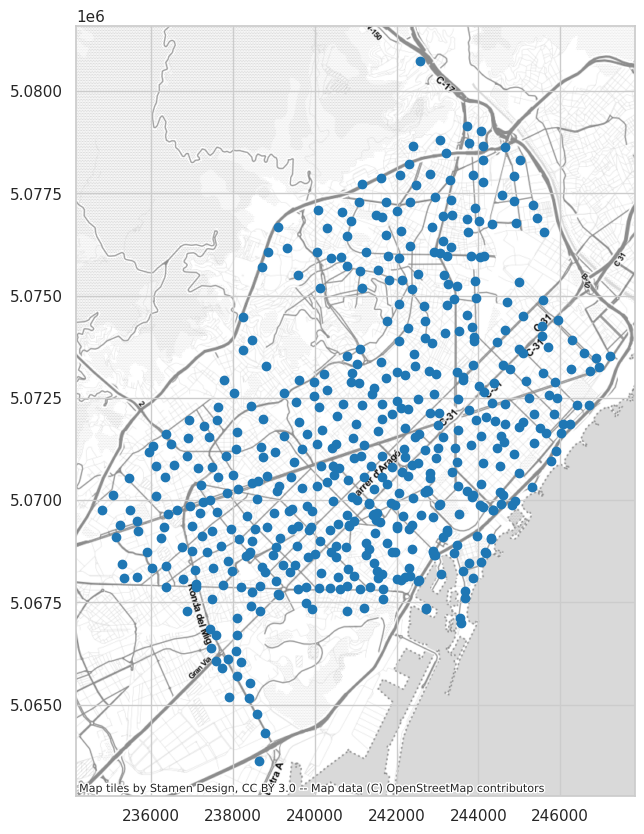

In [ ]:
gdf_stations.to_crs(3857, inplace=True)
ax = gdf_stations.plot(figsize = (10,10))
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)

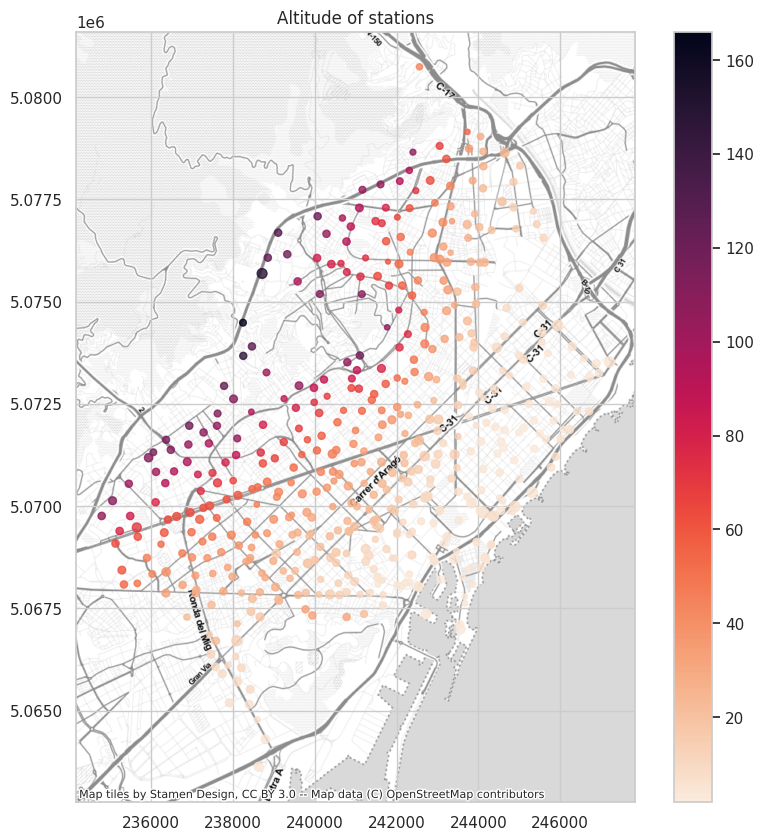

In [ ]:
ax = gdf_stations.plot(figsize = (10,10), column='altitude', markersize=gdf_stations['capacity'], cmap='rocket_r', alpha=0.8, legend=True)
ax.set_title('Altitude of stations')
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)

In [ ]:
gdf_stations.crs #dá a informação do crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Availability map by time:

In [ ]:
# reduces df to plot
df_reduced = df[['hour', 'station_id', 'lat', 'lon', 'percentage_docks_available']]

In [ ]:
#new df with average per hour
# df_hours = df.groupby(by=['hour', 'station_id', 'lat', 'lon', 'altitude'], as_index=False)['percentage_docks_available'].mean()
df_hours = df_reduced.groupby(by=['hour', 'station_id', 'lat', 'lon'], as_index=False)['percentage_docks_available'].mean()

In [ ]:
df_hours['percentage_docks_available'] = df_hours['percentage_docks_available'].round(1)
df_hours.head()

,hour,station_id,lat,lon,percentage_docks_available
0,0,1,41.397978,2.180107,0.4
1,0,2,41.395488,2.177198,0.4
2,0,3,41.394156,2.181331,0.5
3,0,4,41.393317,2.181248,0.5
4,0,5,41.391103,2.180176,0.6


In [ ]:
gdf_hours = gpd.GeoDataFrame(data = df_hours, geometry = gpd.points_from_xy(df_hours['lon'], df_hours['lat']), crs=4326)
gdf_hours.to_crs(3857, inplace=True)

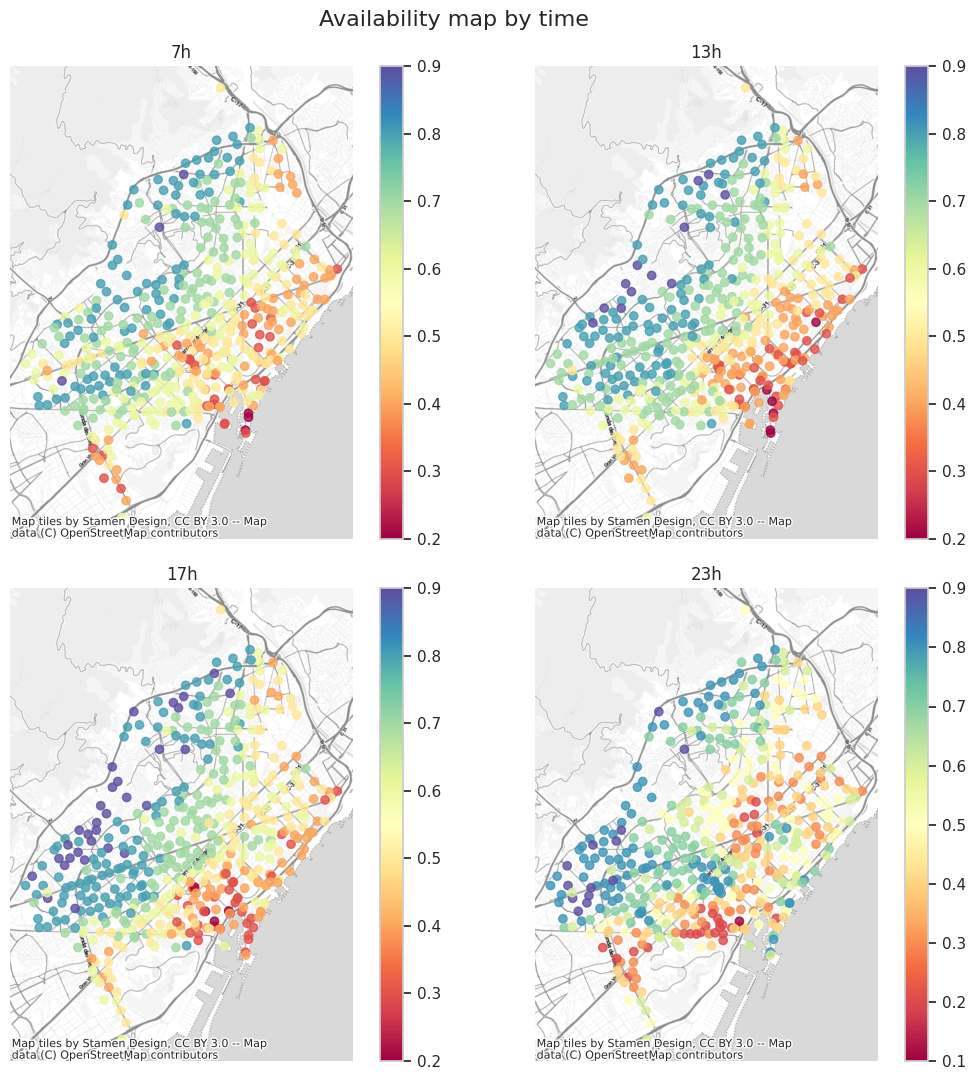

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(11, 11))
fig.suptitle('Availability map by time', fontsize=16)

gdf_hours[gdf_hours.hour == 7].plot(column='percentage_docks_available', cmap='Spectral', alpha=0.8, legend=True, ax=axs[0, 0])
axs[0, 0].set_title("7h")
axs[0, 0].axis('off')
cx.add_basemap(ax=axs[0, 0], source=cx.providers.Stamen.TonerLite)

gdf_hours[gdf_hours.hour == 13].plot(column='percentage_docks_available', cmap='Spectral', alpha=0.8, legend=True, ax=axs[0, 1])
axs[0, 1].set_title("13h")
axs[0, 1].axis('off')
cx.add_basemap(ax=axs[0, 1], source=cx.providers.Stamen.TonerLite)

gdf_hours[gdf_hours.hour == 17].plot(column='percentage_docks_available', cmap='Spectral', alpha=0.8, legend=True, ax=axs[1, 0])
axs[1, 0].set_title("17h")
axs[1, 0].axis('off')
cx.add_basemap(ax=axs[1, 0], source=cx.providers.Stamen.TonerLite)

gdf_hours[gdf_hours.hour == 23].plot(column='percentage_docks_available', cmap='Spectral', alpha=0.8, legend=True, ax=axs[1, 1])
axs[1, 1].set_title("23h")
axs[1, 1].axis('off')
cx.add_basemap(ax=axs[1, 1], source=cx.providers.Stamen.TonerLite)

fig.tight_layout()

____________________________________________